In [1]:
# Packages to run the code

import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from scipy.stats import binom

from scipy.integrate import quad

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [2]:
def z(x,b):
    return np.exp(b*np.cos(x))
def laplace(b):
    return np.exp(b)*np.sqrt(2*np.pi/b)

<IPython.core.display.Javascript object>


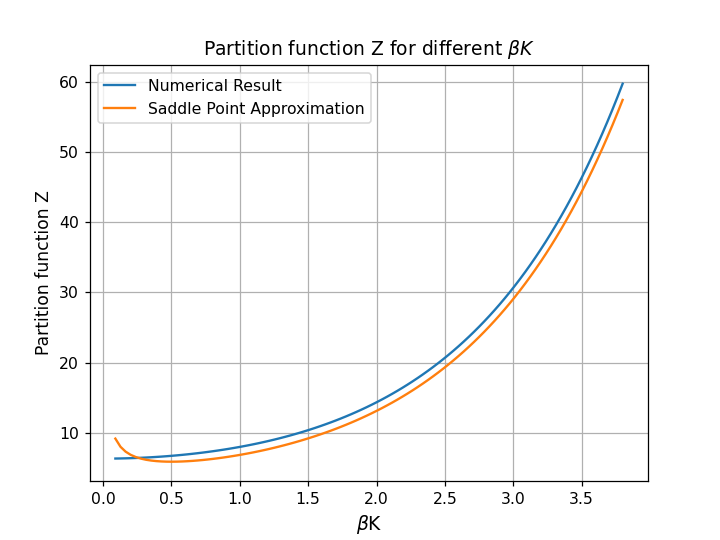

In [3]:
b = np.linspace(0.09,3.8,100)

Z = []

for i in range(len(b)):
    Z.append(quad(z,0, 2*np.pi, args = b[i])[0])
Z = np.array(Z)

fig, ax = plt.subplots(1,1)

plt.plot(b, Z, label = 'Numerical Result')
plt.plot(b, laplace(b), linestyle = '-', label = 'Saddle Point Approximation')
#plt.hlines(0, min(Temp), max(Temp), colors='r', linestyles='dashed', label='b2 = 0 line')

plt.xlabel(r'$\beta$K', size = 12)
plt.ylabel('Partition function Z', size = 11)
plt.title(r'Partition function Z for different $\beta K$')

plt.legend()
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


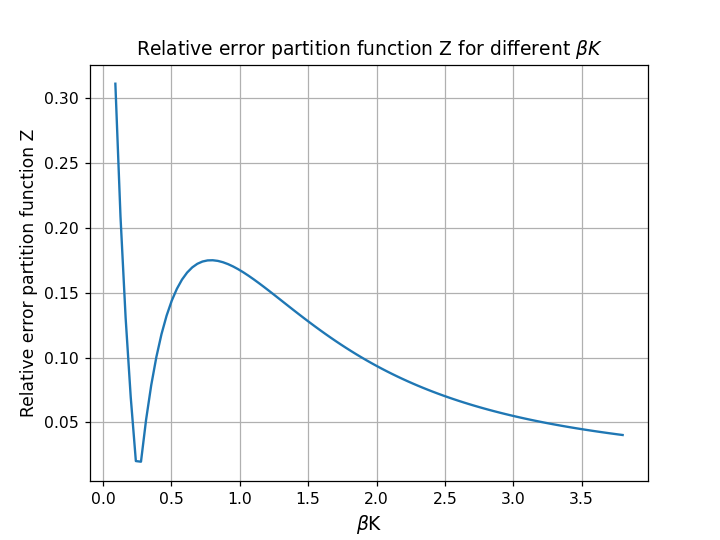

In [4]:
rel_error = abs(Z-laplace(b))/laplace(b)

fig, ax = plt.subplots(1,1)

plt.plot(b, rel_error)

plt.xlabel(r'$\beta$K', size = 12)
plt.ylabel('Relative error partition function Z', size = 11)
plt.title(r'Relative error partition function Z for different $\beta K$')

plt.grid()

plt.show()

In [5]:
db = b[1]-b[0]

Zlog = np.log(Z)

cos = np.gradient(Zlog, db)

<IPython.core.display.Javascript object>


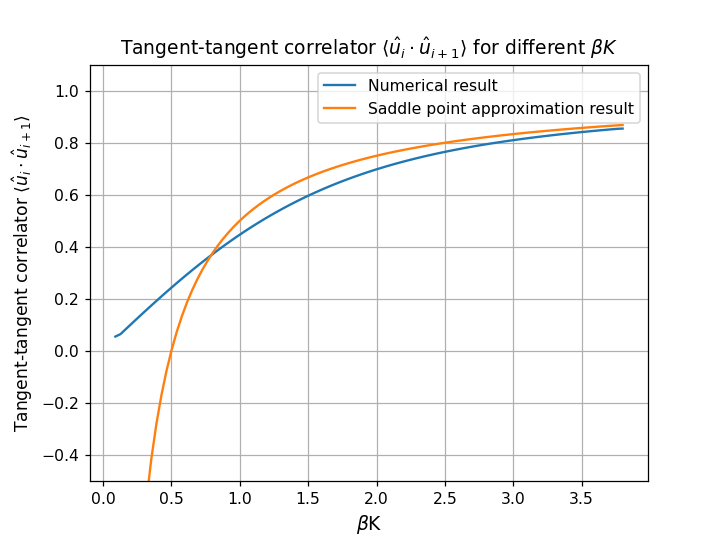

In [6]:
fig, ax = plt.subplots(1,1)

plt.plot(b,cos, label = 'Numerical result')
plt.plot(b,1-1/(2*b), label = 'Saddle point approximation result')

plt.xlabel(r'$\beta$K', size = 12)
plt.ylabel(r'Tangent-tangent correlator $\langle \hat{u}_{i} \cdot \hat{u}_{i+1} \rangle$', size = 11)
plt.title(r'Tangent-tangent correlator $\langle \hat{u}_{i} \cdot \hat{u}_{i+1} \rangle$ for different $\beta K$')

plt.ylim([-0.5,1.1])

plt.grid()
plt.legend()

plt.show()

<IPython.core.display.Javascript object>


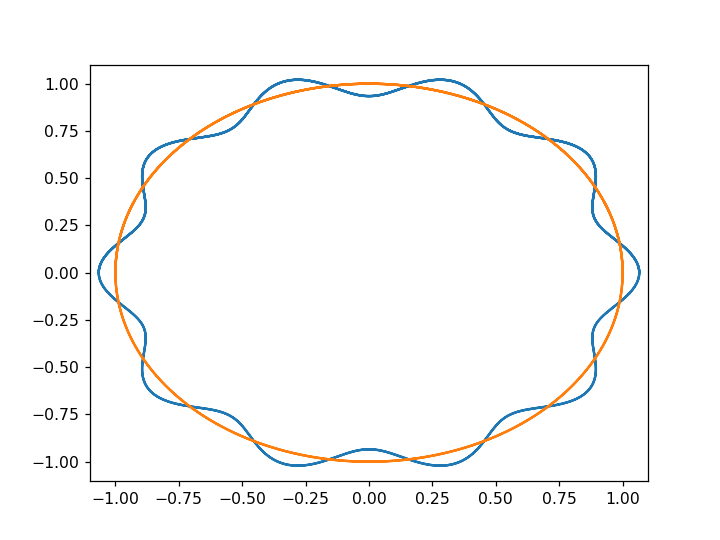

In [7]:
import matplotlib.animation as animation


theta = np.linspace(0,5*np.pi,1000)

turns = 10
a = 1


fig, ax = plt.subplots(1,1)

line, = ax.plot([], [])

plt.plot(np.cos(theta), np.sin(theta))


def animate(i):
    line.set_data(np.cos(theta) + a*np.sin(i/10)*np.cos(turns*theta)/turns*np.cos(theta), np.sin(theta) + a*np.sin(i/10)*np.cos(turns*theta)/turns*np.sin(theta))
        
anim = animation.FuncAnimation(fig, animate, frames=100, interval=100)

plt.show()

In [8]:
def R(L,l):
    return 2*l*L*(1- l/L*(1-np.exp(-L/l))   )

<IPython.core.display.Javascript object>


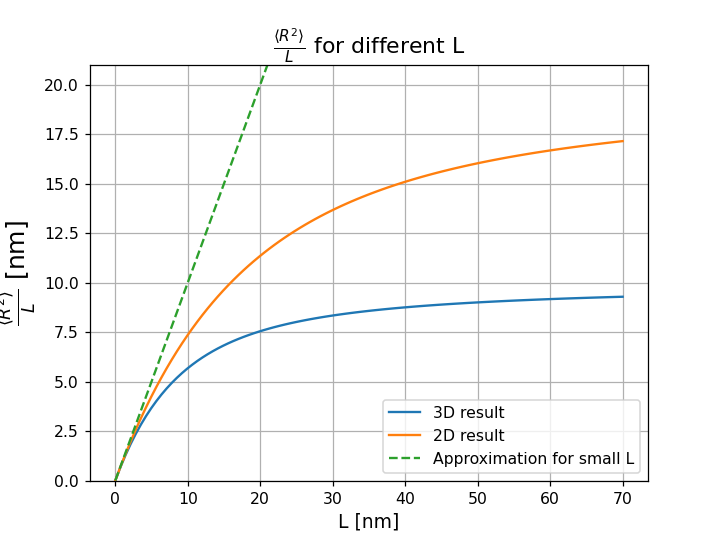

In [9]:
l1 = 5
l2 = 2*l1

L = np.linspace(0.01,70,100)

fig, ax = plt.subplots(1,1)

plt.plot(L,R(L,l1)/L, label = '3D result')
plt.plot(L,R(L,l2)/L, label = '2D result')
plt.plot(L,L, label = 'Approximation for small L', linestyle = '--')

plt.ylim(0, 2*l2+1)

plt.xlabel('L [nm]', size = 12)
plt.ylabel(r'$\frac{\langle R^{2} \rangle}{L}$ [nm]', size = 16)
plt.title(r'$\frac{\langle R^{2} \rangle}{L}$ for different L', size = 14)

plt.grid()
plt.legend()


plt.show()

<IPython.core.display.Javascript object>


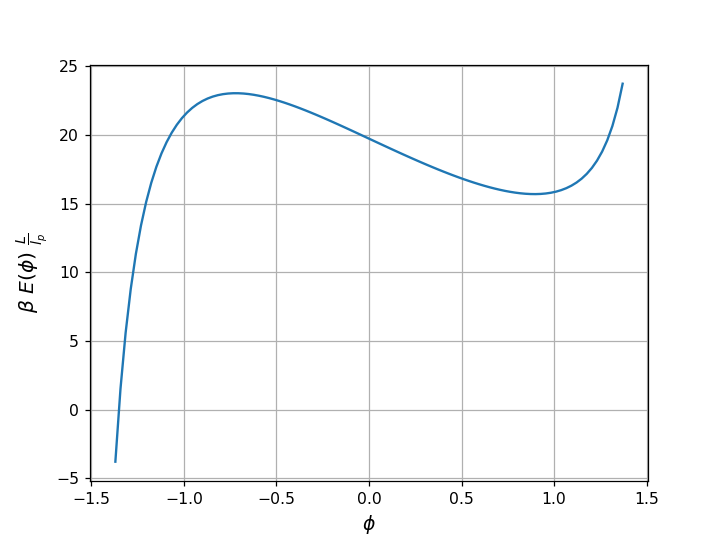

In [10]:
phi = np.linspace(-np.pi/2+0.2,np.pi/2-0.2,100)


fig, ax = plt.subplots(1,1)

plt.plot(phi, 2*(np.pi-phi)*(np.pi-phi+np.tan(phi)))
plt.grid()
plt.xlabel(r'$\phi$', size = 12)
plt.ylabel(r'$\beta \ E(\phi) \ \frac{L}{l_{p}}$', size = 13)


plt.show()

In [11]:
def energy(phi):
    return 2*(np.pi-phi)*(np.pi-phi+np.tan(phi))

def denergy(phi):
    return -2*(np.pi-phi)-np.tan(phi)+(np.pi-phi)/np.cos(phi)**2

In [12]:
from scipy.optimize import fsolve

sol = fsolve(denergy, [0.8])[0]

print('The angle that minimises the energy equals ' + str(round(sol,3)) + ' rad = ' + str(round(sol*180/np.pi,3)) + ' degrees')
print(r'The dimensionless energy for this angle is given by ' + str(round(energy(sol),3)))

The angle that minimises the energy equals 0.895 rad = 51.273 degrees
The dimensionless energy for this angle is given by 15.699


<IPython.core.display.Javascript object>


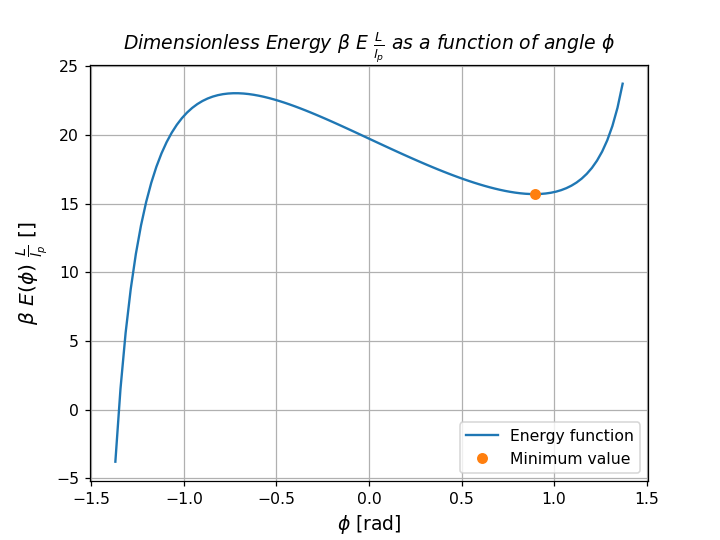

In [13]:
phi = np.linspace(-np.pi/2+0.2,np.pi/2-0.2,100)


fig, ax = plt.subplots(1,1)

plt.plot(phi, 2*(np.pi-phi)*(np.pi-phi+np.tan(phi)), label = 'Energy function')
plt.plot(sol, energy(sol), 'o', label = 'Minimum value')
plt.grid()
plt.xlabel(r'$\phi$ [rad]', size = 12)
plt.ylabel(r'$\beta \ E(\phi) \ \frac{L}{l_{p}}$ []', size = 13)

plt.title(r'$Dimensionless \ Energy \ \beta \ E \ \frac{L}{l_{p}} \ as \ a \ function \ of \ angle \ \phi$')

plt.legend()

plt.show()